# Bike Dataset

In [2]:
import pandas as pd

# Load the uploaded CSV file
file_path = "BIKE DETAILS.csv"
bike_df = pd.read_csv(file_path)

# Display basic info and the first few rows of the dataset
bike_df.info(), bike_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


(None,
                                   name  selling_price  year seller_type  \
 0            Royal Enfield Classic 350         175000  2019  Individual   
 1                            Honda Dio          45000  2017  Individual   
 2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
 3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
 4                Yamaha SZ [2013-2014]          20000  2011  Individual   
 
        owner  km_driven  ex_showroom_price  
 0  1st owner        350                NaN  
 1  1st owner       5650                NaN  
 2  1st owner      12000           148114.0  
 3  1st owner      23000            89643.0  
 4  2nd owner      21000                NaN  )

In [3]:
# Calculate the minimum and maximum selling prices
min_price = bike_df['selling_price'].min()
max_price = bike_df['selling_price'].max()

min_price, max_price


(5000, 760000)

In [4]:
# Calculate the median selling price
median_price = bike_df['selling_price'].median()
median_price


45000.0

In [5]:
# Find the most common seller type
most_common_seller = bike_df['seller_type'].value_counts().idxmax()
seller_counts = bike_df['seller_type'].value_counts()

most_common_seller, seller_counts


('Individual',
 seller_type
 Individual    1055
 Dealer           6
 Name: count, dtype: int64)

In [6]:
high_km_count = bike_df[bike_df['km_driven'] > 50000].shape[0]
print(high_km_count)


170


In [7]:
bike_df.groupby('owner')['km_driven'].mean()


,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


In [8]:
older_bikes = bike_df[bike_df['year'] <= 2015].shape[0]
total_bikes = bike_df.shape[0]
proportion = older_bikes / total_bikes


In [9]:
bike_df.isnull().sum()
(bike_df.isnull().sum() / len(bike_df)) * 100


,0
name,0.000000
selling_price,0.000000
year,0.000000
seller_type,0.000000
owner,0.000000
km_driven,0.000000
ex_showroom_price,40.999057


In [12]:

df_clean = bike_df.dropna(subset=['ex_showroom_price'])

df_clean['ex_showroom_price'] = pd.to_numeric(df_clean['ex_showroom_price'])

max_price_row = df_clean.loc[df_clean['ex_showroom_price'].idxmax()]


print("Bike with Highest Ex-Showroom Price:")
print(f"Bike Name: {max_price_row['name']}")
print(f"Ex-Showroom Price: ₹{max_price_row['ex_showroom_price']:,.2f}")
print(f"Year: {max_price_row['year']}")
print(f"Current Selling Price: ₹{max_price_row['selling_price']:,.2f}")
print(f"Ownership: {max_price_row['owner']}")
print(f"Kilometers Driven: {max_price_row['km_driven']:,} km")


Bike with Highest Ex-Showroom Price:
Bike Name: Harley-Davidson Street Bob
Ex-Showroom Price: ₹1,278,000.00
Year: 2013
Current Selling Price: ₹750,000.00
Ownership: 2nd owner
Kilometers Driven: 12,000 km


<ipython-input-12-daad51ad0bb5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['ex_showroom_price'] = pd.to_numeric(df_clean['ex_showroom_price'])


In [15]:

seller_counts = bike_df['seller_type'].value_counts()


print("Number of Bikes Listed by Seller Type:")
print(seller_counts.to_string())

total_bikes = len(bike_df)
percentage_dist = (seller_counts / total_bikes) * 100

print("\nPercentage Distribution:")
print(percentage_dist.round(2).astype(str) + '%')

Number of Bikes Listed by Seller Type:
seller_type
Individual    1055
Dealer           6

Percentage Distribution:
seller_type
Individual    99.43%
Dealer         0.57%
Name: count, dtype: object


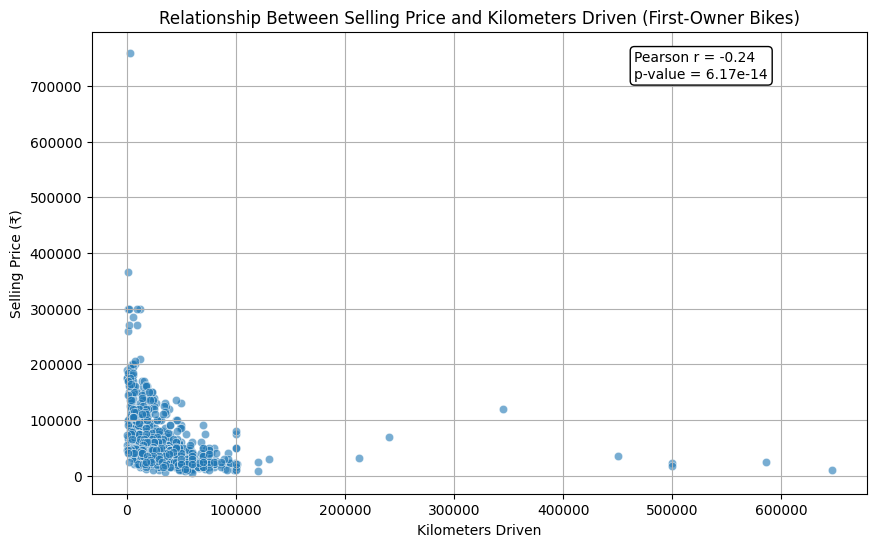


Statistical Summary:
Correlation Coefficient: -0.24
P-value: 6.17e-14

Price vs Mileage Relationship:
• Negative correlation (r = -0.24) indicates that higher mileage generally correlates with lower prices
• The extremely small p-value (p < 0.001) suggests this relationship is statistically significant


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr


first_owner = bike_df[bike_df['owner'] == '1st owner'].copy()

first_owner['selling_price'] = pd.to_numeric(first_owner['selling_price'])
first_owner['km_driven'] = pd.to_numeric(first_owner['km_driven'])

corr, p_value = pearsonr(first_owner['selling_price'], first_owner['km_driven'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=first_owner, x='km_driven', y='selling_price', alpha=0.6)
plt.title('Relationship Between Selling Price and Kilometers Driven (First-Owner Bikes)')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price (₹)')
plt.grid(True)

# Annotate with correlation info
plt.annotate(f'Pearson r = {corr:.2f}\np-value = {p_value:.2e}',
             xy=(0.7, 0.9), xycoords='axes fraction',
             bbox=dict(boxstyle='round', fc='white'))

# Show the plot
plt.show()

# Print statistical summary
print("\nStatistical Summary:")
print(f"Correlation Coefficient: {corr:.2f}")
print(f"P-value: {p_value:.2e}")

print("\nPrice vs Mileage Relationship:")
print(f"• Negative correlation (r = {corr:.2f}) indicates that higher mileage generally correlates with lower prices")
print(f"• The extremely small p-value (p < 0.001) suggests this relationship is statistically significant")

Found 39 outliers in km_driven column
Outlier statistics:
count        39.000000
mean     195689.538462
std      190617.829805
min       89000.000000
25%       99500.000000
50%      100000.000000
75%      171500.000000
max      880000.000000
Name: km_driven, dtype: float64

Before cleaning:
Total bikes: 1061
Min km_driven: 350
Max km_driven: 880000

After removing outliers:
Total bikes remaining: 1022
New min km_driven: 350
New max km_driven: 86000


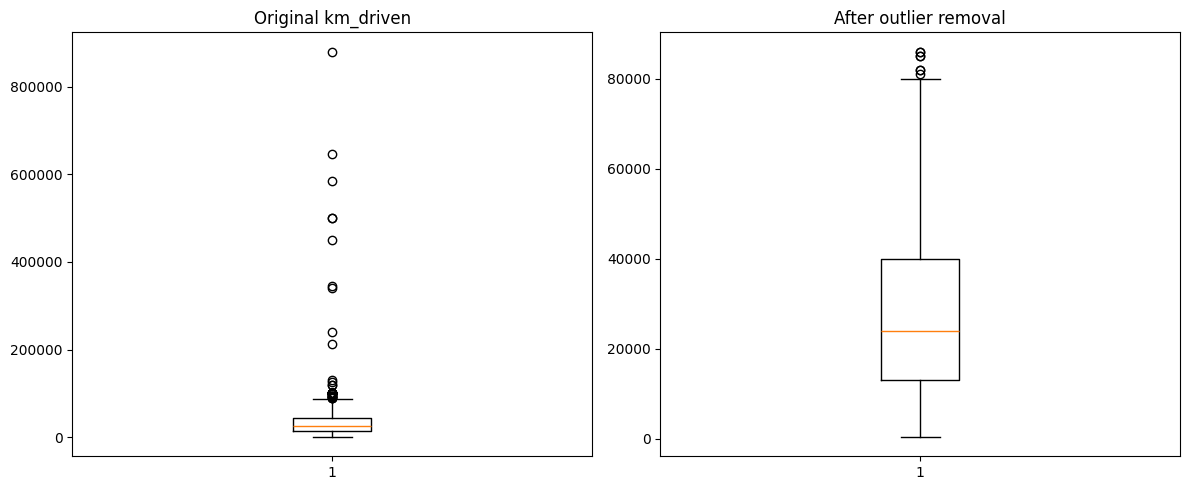

In [21]:
import pandas as pd
import numpy as np

bike_df['km_driven'] = pd.to_numeric(bike_df['km_driven'], errors='coerce')

# Calculate IQR statistics
Q1 = bike_df['km_driven'].quantile(0.25)
Q3 = bike_df['km_driven'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = bike_df[(bike_df['km_driven'] < lower_bound) | (bike_df['km_driven'] > upper_bound)]
print(f"Found {len(outliers)} outliers in km_driven column")
print("Outlier statistics:")
print(outliers['km_driven'].describe())


df_clean = bike_df[(bike_df['km_driven'] >= lower_bound) & (bike_df['km_driven'] <= upper_bound)].copy()

print("\nBefore cleaning:")
print(f"Total bikes: {len(bike_df)}")
print(f"Min km_driven: {bike_df['km_driven'].min()}")
print(f"Max km_driven: {bike_df['km_driven'].max()}")

print("\nAfter removing outliers:")
print(f"Total bikes remaining: {len(df_clean)}")
print(f"New min km_driven: {df_clean['km_driven'].min()}")
print(f"New max km_driven: {df_clean['km_driven'].max()}")


import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.boxplot(bike_df['km_driven'].dropna())
plt.title('Original km_driven')

plt.subplot(1, 2, 2)
plt.boxplot(df_clean['km_driven'].dropna())
plt.title('After outlier removal')

plt.tight_layout()
plt.show()

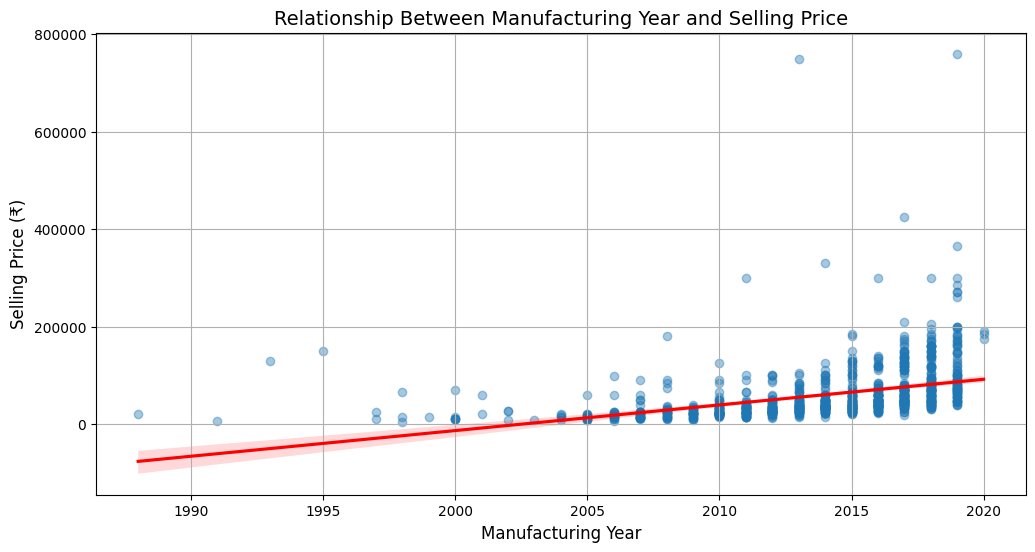

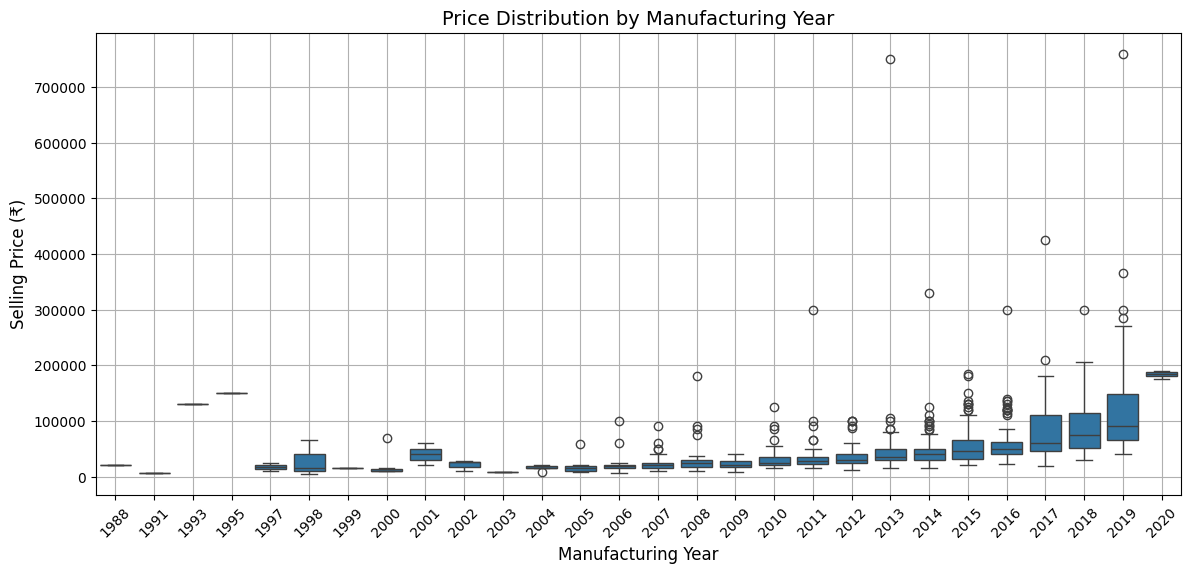

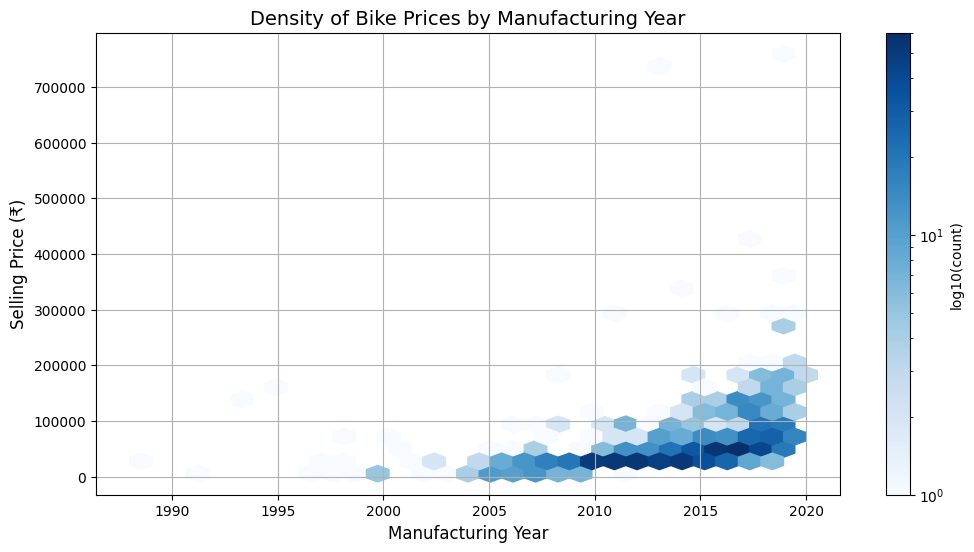


Correlation Analysis:
                   year  selling_price
year           1.000000       0.402188
selling_price  0.402188       1.000000

Average Selling Price by Year:
year
2020    183333.333333
1995    150000.000000
1993    130000.000000
2019    119689.511628
2018     87660.374046
2017     78894.736842
2016     58469.018692
2015     56500.000000
2013     51136.986301
2014     48668.131868
Name: selling_price, dtype: float64


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


bike_df['year'] = pd.to_numeric(bike_df['year'], errors='coerce')
bike_df['selling_price'] = pd.to_numeric(bike_df['selling_price'], errors='coerce')

# Remove rows with missing values in these columns
df_clean = bike_df.dropna(subset=['year', 'selling_price'])

# 1. Scatter Plot with Trend Line
plt.figure(figsize=(12, 6))
sns.regplot(x='year', y='selling_price', data=df_clean,
            scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Relationship Between Manufacturing Year and Selling Price', fontsize=14)
plt.xlabel('Manufacturing Year', fontsize=12)
plt.ylabel('Selling Price (₹)', fontsize=12)
plt.grid(True)
plt.show()

# 2. Boxplot by Year
plt.figure(figsize=(14, 6))
sns.boxplot(x='year', y='selling_price', data=df_clean)
plt.title('Price Distribution by Manufacturing Year', fontsize=14)
plt.xlabel('Manufacturing Year', fontsize=12)
plt.ylabel('Selling Price (₹)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 3. Hexbin Plot for Density Visualization
plt.figure(figsize=(12, 6))
plt.hexbin(df_clean['year'], df_clean['selling_price'],
           gridsize=30, cmap='Blues', bins='log')
plt.colorbar(label='log10(count)')
plt.title('Density of Bike Prices by Manufacturing Year', fontsize=14)
plt.xlabel('Manufacturing Year', fontsize=12)
plt.ylabel('Selling Price (₹)', fontsize=12)
plt.grid(True)
plt.show()

# 4. Statistical Analysis
print("\nCorrelation Analysis:")
corr = df_clean[['year', 'selling_price']].corr()
print(corr)

# Calculate average price by year
avg_price_by_year = df_clean.groupby('year')['selling_price'].mean()
print("\nAverage Selling Price by Year:")
print(avg_price_by_year.sort_values(ascending=False).head(10))

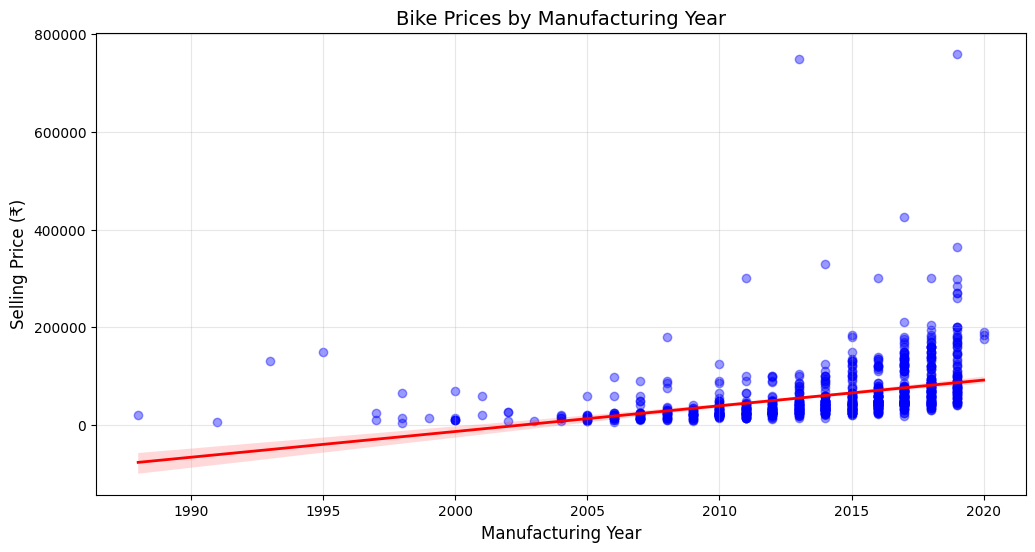

<ipython-input-23-42423e2df0d2>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year', y='selling_price', data=bike_df_clean,


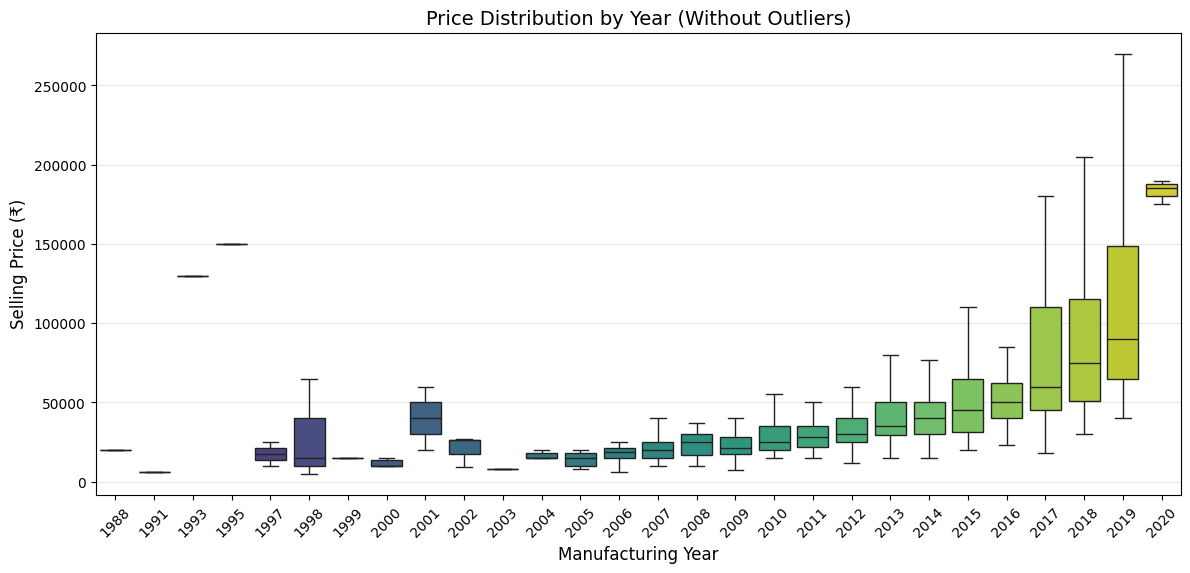


=== Statistical Analysis ===
Correlation between year and price: 0.40

Top 5 Years by Average Price:
               mean    median  count
year                                
2020  183333.333333  185000.0      3
1995  150000.000000  150000.0      1
1993  130000.000000  130000.0      1
2019  119689.511628   89999.5     86
2018   87660.374046   75000.0    131


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


bike_df['year'] = pd.to_numeric(bike_df['year'], errors='coerce')
bike_df['selling_price'] = pd.to_numeric(bike_df['selling_price'], errors='coerce')

# Clean data - remove rows with missing values
bike_df_clean = bike_df.dropna(subset=['year', 'selling_price'])

# 1. Scatter Plot with Trend Line
plt.figure(figsize=(12, 6))
sns.regplot(x='year', y='selling_price', data=bike_df_clean,
            scatter_kws={'alpha':0.4, 'color':'blue'},
            line_kws={'color':'red', 'linewidth':2})
plt.title('Bike Prices by Manufacturing Year', fontsize=14)
plt.xlabel('Manufacturing Year', fontsize=12)
plt.ylabel('Selling Price (₹)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# 2. Enhanced Boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(x='year', y='selling_price', data=bike_df_clean,
            palette='viridis', showfliers=False)
plt.title('Price Distribution by Year (Without Outliers)', fontsize=14)
plt.xlabel('Manufacturing Year', fontsize=12)
plt.ylabel('Selling Price (₹)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

# 3. Statistical Analysis
print("\n=== Statistical Analysis ===")
correlation = bike_df_clean[['year', 'selling_price']].corr().iloc[0,1]
print(f"Correlation between year and price: {correlation:.2f}")

# Yearly price statistics
yearly_stats = bike_df_clean.groupby('year')['selling_price'].agg(['mean', 'median', 'count'])
print("\nTop 5 Years by Average Price:")
print(yearly_stats.sort_values('mean', ascending=False).head(5))

<ipython-input-24-1f8b1601bc31>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_df['year'] = bike_df['year'].astype(int)
<ipython-input-24-1f8b1601bc31>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_df['age'] = current_year - bike_df['year']


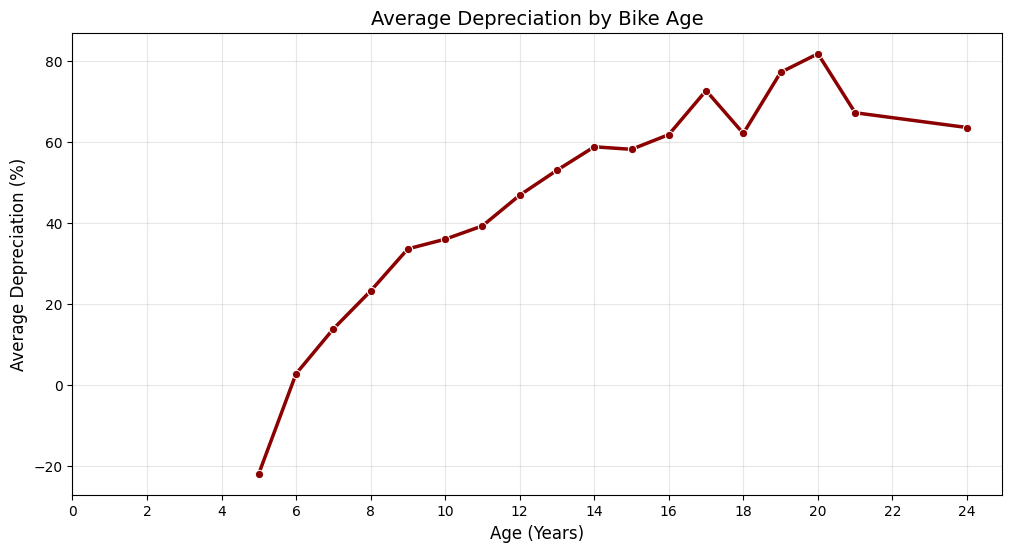


=== Depreciation Statistics ===
Average annual depreciation: 3.4% per year

Depreciation by Age Group:
   age  depreciation_pct
0    5             -22.0
1    6               2.7
2    7              13.8
3    8              23.1
4    9              33.6
5   10              35.9
6   11              39.2
7   12              46.8
8   13              53.0
9   14              58.8


KeyboardInterrupt: Interrupted by user

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


current_year = datetime.now().year


bike_df = bike_df.dropna(subset=['year', 'selling_price', 'ex_showroom_price'])
bike_df['year'] = bike_df['year'].astype(int)
bike_df['age'] = current_year - bike_df['year']

bike_df = bike_df[bike_df['ex_showroom_price'] > 0]  # Remove invalid prices
bike_df['depreciation_pct'] = ((bike_df['ex_showroom_price'] - bike_df['selling_price']) /
                              bike_df['ex_showroom_price']) * 100


depreciation_by_age = bike_df.groupby('age')['depreciation_pct'].mean().reset_index()


plt.figure(figsize=(12, 6))
sns.lineplot(x='age', y='depreciation_pct', data=depreciation_by_age,
             marker='o', color='darkred', linewidth=2.5)
plt.title('Average Depreciation by Bike Age', fontsize=14)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Average Depreciation (%)', fontsize=12)
plt.xticks(range(0, depreciation_by_age['age'].max()+1, 2))
plt.grid(True, alpha=0.3)
plt.show()

print("\n=== Depreciation Statistics ===")
print(f"Average annual depreciation: {bike_df['depreciation_pct'].mean()/bike_df['age'].mean():.1f}% per year")
print("\nDepreciation by Age Group:")
print(depreciation_by_age.round(1).head(10))


if input("Show brand-specific analysis? (y/n): ").lower() == 'y':
    top_brands = bike_df['name'].str.extract('([A-Za-z]+)')[0].value_counts().head(5).index
    plt.figure(figsize=(12, 6))
    for brand in top_brands:
        brand_data = bike_df[bike_df['name'].str.contains(brand)]
        if not brand_data.empty:
            brand_dep = brand_data.groupby('age')['depreciation_pct'].mean()
            sns.lineplot(x=brand_dep.index, y=brand_dep.values, label=brand)
    plt.title('Depreciation Comparison by Brand', fontsize=14)
    plt.legend()
    plt.show()

In [45]:

bike_df['year'] = pd.to_numeric(bike_df['year'], errors='coerce')
bike_df['selling_price'] = pd.to_numeric(bike_df['selling_price'], errors='coerce')

# Calculate yearly averages and standard deviations
yearly_stats = bike_df.groupby('year')['selling_price'].agg(['mean', 'std']).reset_index()
yearly_stats.columns = ['year', 'yearly_xmean', 'yearly_xstd']

# Merge with original data
bike_df = pd.merge(bike_df, yearly_stats, on='year', how='left')

# Calculate z-scores (measure of how many standard deviations above the mean)
bike_df['price_zscore'] = (bike_df['selling_price'] - bike_df['yearly_mean']) / bike_df['yearly_std']

# Define premium bikes (2 standard deviations above mean)
premium_bikes = bike_df[bike_df['price_zscore'] > 2].sort_values('price_zscore', ascending=False)

# Display results
print("Premium Bikes (Priced Significantly Above Their Year's Average)")

print(f"Found {len(premium_bikes)} premium bikes ({len(premium_bikes)/len(bike_df)*100:.1f}% of total)")

# Show top 20 premium bikes
pd.set_option('display.max_colwidth', 40)
print(premium_bikes[['name', 'year', 'selling_price', 'yearly_mean', 'price_zscore']]
      .sort_values('price_zscore', ascending=False)
      .head(20)
      .round({'yearly_mean': 0, 'price_zscore': 2}))

Premium Bikes (Priced Significantly Above Their Year's Average)
Found 19 premium bikes (3.0% of total)
                                   name  year  selling_price  yearly_mean  \
490                  Kawasaki Ninja 300  2016         300000      53597.0   
159      Kawasaki Ninja 650 [2018-2019]  2017         425000      70529.0   
78           Harley-Davidson Street Bob  2013         750000      52349.0   
171          Harley-Davidson Street 750  2014         330000      49453.0   
163                     Suzuki GSX S750  2019         760000     111125.0   
471      Kawasaki Ninja 650 [2018-2019]  2011         300000      36788.0   
91   Royal Enfield Classic Desert Storm  2012         100000      32810.0   
185                          BMW G310GS  2018         300000      87838.0   
160                 Kawasaki Ninja 250R  2010         125000      32057.0   
486        Royal Enfield Classic Chrome  2015         185000      54550.0   
229        KTM 390 Duke ABS [2013-2016]  2015     

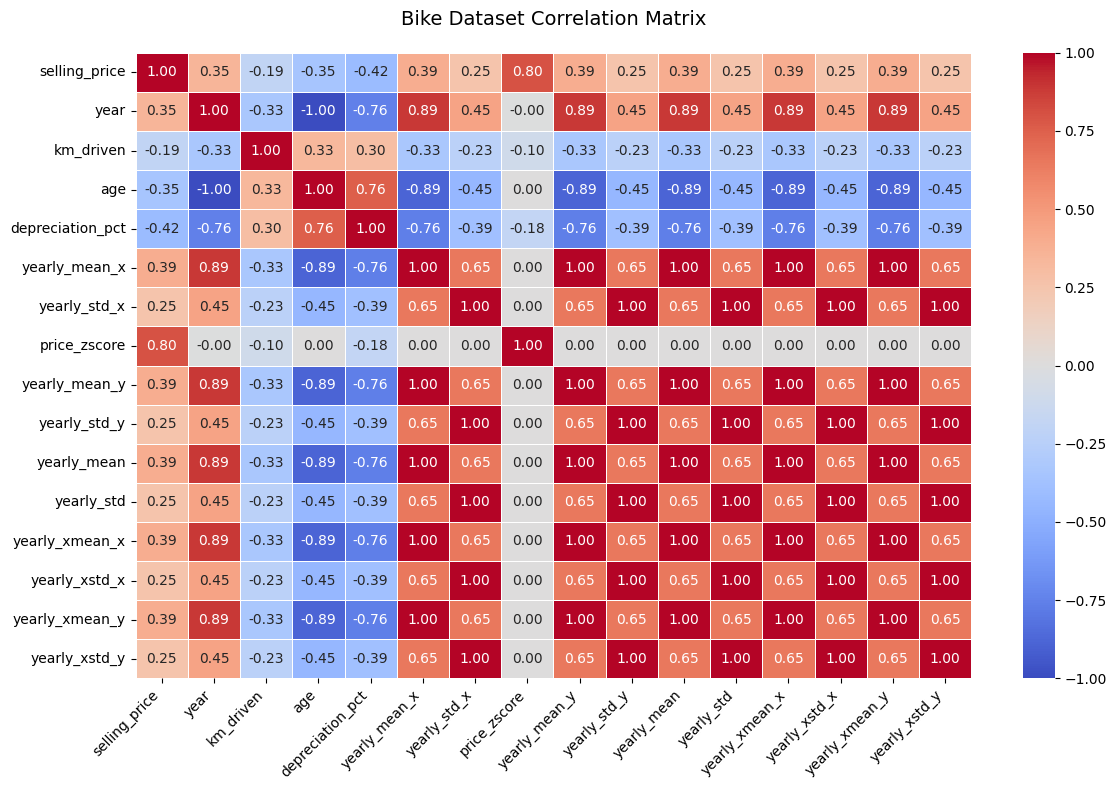


Key Correlation Insights:
1. Year vs Price: 0.35 (Newer bikes tend to be more expensive)
2. Km_Driven vs Price: -0.19 (Higher mileage correlates with lower prices)
3. Year vs Km_Driven: -0.33 (Newer bikes tend to have fewer kilometers)


In [46]:




# Select numeric columns (excluding non-numeric and identifier columns)
numeric_cols = bike_df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['ex_showroom_price']]  # Optional: remove if many missing values

# Calculate correlation matrix
corr_matrix = bike_df[numeric_cols].corr()

# Create heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            linewidths=0.5,
            annot_kws={"size": 10})

# Customize plot
plt.title('Bike Dataset Correlation Matrix', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Show plot
plt.tight_layout()
plt.show()

# Print correlation insights
print("\nKey Correlation Insights:")
print(f"1. Year vs Price: {corr_matrix.loc['year', 'selling_price']:.2f} (Newer bikes tend to be more expensive)")
print(f"2. Km_Driven vs Price: {corr_matrix.loc['km_driven', 'selling_price']:.2f} (Higher mileage correlates with lower prices)")
print(f"3. Year vs Km_Driven: {corr_matrix.loc['year', 'km_driven']:.2f} (Newer bikes tend to have fewer kilometers)")

# Car Sales

In [1]:
import pandas as pd

# Load the data
df = pd.read_csv('Car Sale.csv')

# Calculate average price by dealer
avg_price_by_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
print("Average Selling Price by Dealer:")
print(avg_price_by_dealer)

Average Selling Price by Dealer:
Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.56

In [2]:
# Calculate price variation by brand
price_variation = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
print("\nBrand with Highest Price Variation:")
print(price_variation.head(1))


Brand with Highest Price Variation:
Company
Lincoln    19658.050211
Name: Price ($), dtype: float64


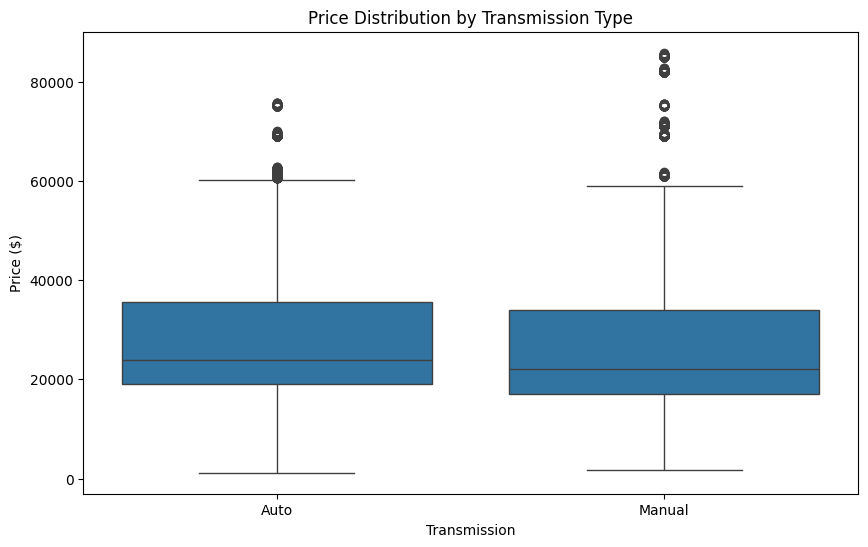


Interquartile Ranges by Transmission Type:
                  IQR
Transmission         
Auto          16500.0
Manual        17000.0


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of prices by transmission type
plt.figure(figsize=(10,6))
sns.boxplot(x='Transmission', y='Price ($)', data=df)
plt.title('Price Distribution by Transmission Type')
plt.show()

# Calculate IQR for each transmission type
iqr = df.groupby('Transmission')['Price ($)'].quantile([0.25, 0.75]).unstack()
iqr['IQR'] = iqr[0.75] - iqr[0.25]
print("\nInterquartile Ranges by Transmission Type:")
print(iqr[['IQR']])

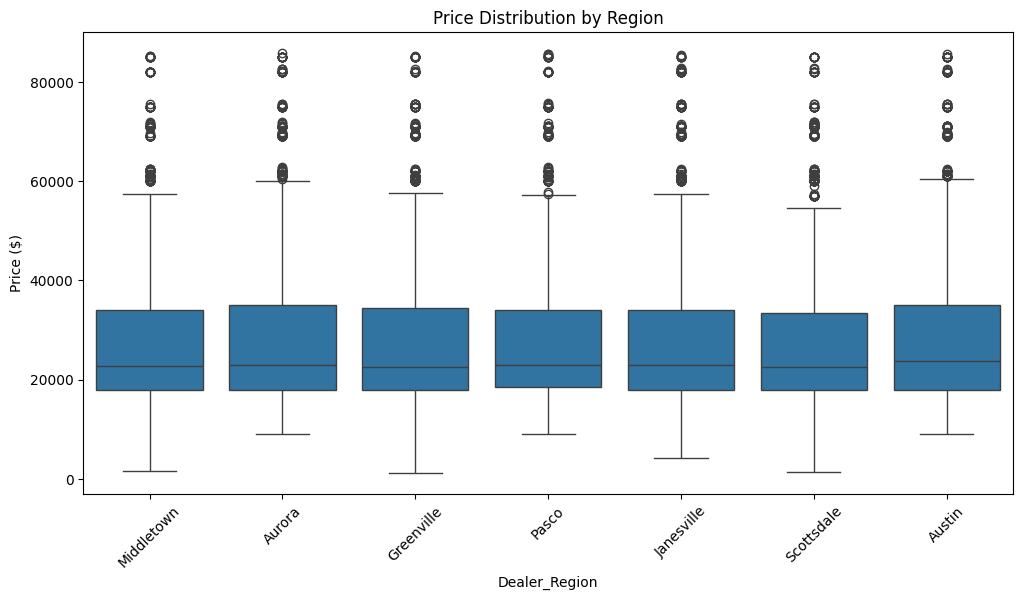

In [4]:
# Boxplot of prices by region
plt.figure(figsize=(12,6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title('Price Distribution by Region')
plt.xticks(rotation=45)
plt.show()


Distribution by Body Style:
Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


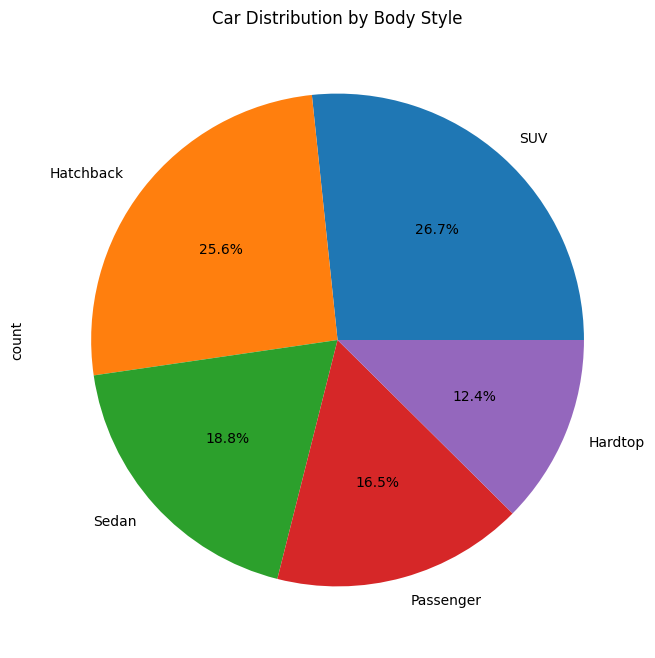

In [5]:
# Count of cars by body style
body_style_counts = df['Body Style'].value_counts()
print("\nDistribution by Body Style:")
print(body_style_counts)

# Pie chart
plt.figure(figsize=(8,8))
body_style_counts.plot.pie(autopct='%1.1f%%')
plt.title('Car Distribution by Body Style')
plt.show()

In [6]:
# Create income brackets
bins = [0, 50000, 100000, 500000, 1000000, float('inf')]
labels = ['<50k', '50k-100k', '100k-500k', '500k-1M', '>1M']
df['Income_Bracket'] = pd.cut(df['Annual Income'], bins=bins, labels=labels)

# Group by gender and income bracket
gender_income_price = df.groupby(['Gender', 'Income_Bracket'])['Price ($)'].mean().unstack()
print("\nAverage Price by Gender and Income Bracket:")
print(gender_income_price)


Average Price by Gender and Income Bracket:
Income_Bracket          <50k  50k-100k     100k-500k       500k-1M  \
Gender                                                               
Female          28132.038732       NaN  28635.027119  28070.242135   
Male            27816.302247   43000.0  28537.169450  27993.611332   

Income_Bracket           >1M  
Gender                        
Female          28579.626947  
Male            28105.557471  


<ipython-input-6-2d929e47df35>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_income_price = df.groupby(['Gender', 'Income_Bracket'])['Price ($)'].mean().unstack()


In [7]:
# Price distribution and count by region
region_stats = df.groupby('Dealer_Region')['Price ($)'].agg(['mean', 'count'])
print("\nPrice and Sales Count by Region:")
print(region_stats)


Price and Sales Count by Region:
                       mean  count
Dealer_Region                     
Aurora         28334.626837   3130
Austin         28341.603628   4135
Greenville     28180.819054   3128
Janesville     27833.350955   3821
Middletown     27856.338875   3128
Pasco          28119.039923   3131
Scottsdale     27954.958928   3433


In [8]:
# Group by engine type
engine_price = df.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)
print("\nAverage Price by Engine Type:")
print(engine_price)


Average Price by Engine Type:
Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


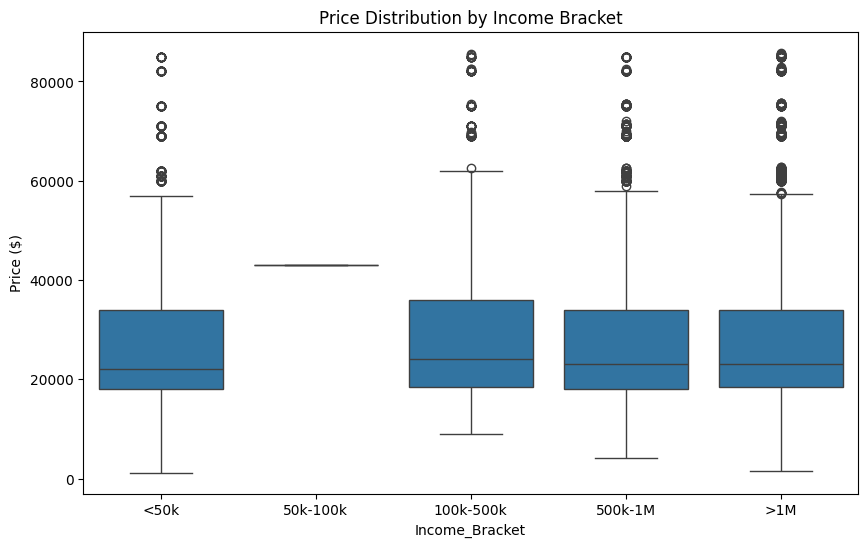

In [9]:
# Boxplot of prices by income bracket
plt.figure(figsize=(10,6))
sns.boxplot(x='Income_Bracket', y='Price ($)', data=df)
plt.title('Price Distribution by Income Bracket')
plt.show()


Top 5 Models by Sales:
Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


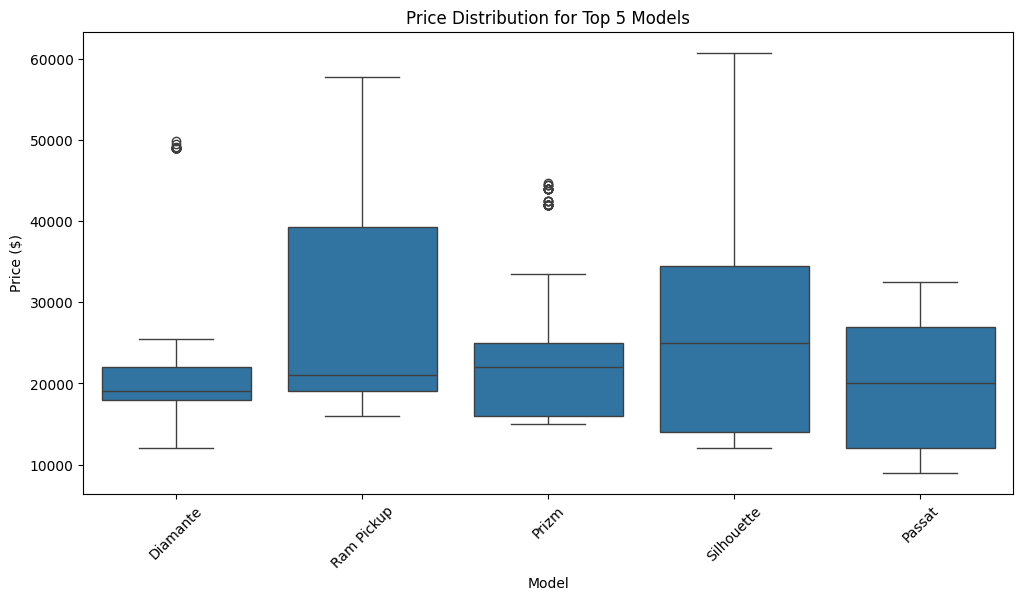

In [10]:
# Top 5 models by sales count
top_models = df['Model'].value_counts().head(5)
print("\nTop 5 Models by Sales:")
print(top_models)

# Price distribution for top models
plt.figure(figsize=(12,6))
sns.boxplot(x='Model', y='Price ($)', data=df[df['Model'].isin(top_models.index)])
plt.title('Price Distribution for Top 5 Models')
plt.xticks(rotation=45)
plt.show()

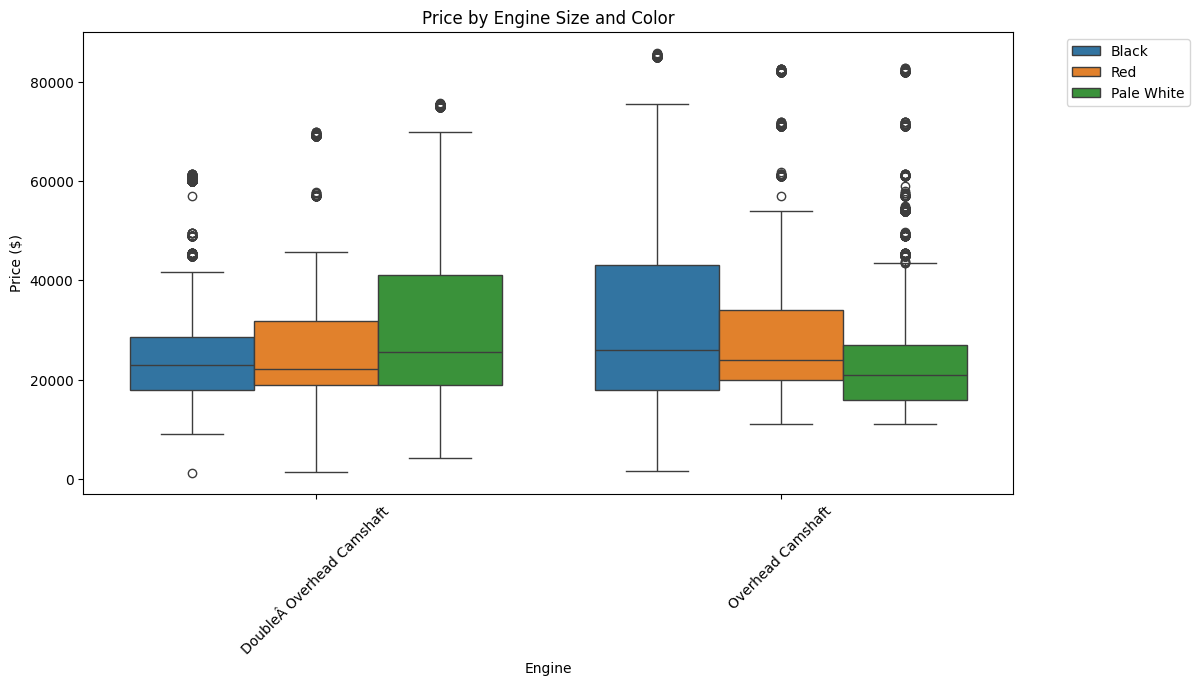

In [11]:
# Interaction between engine size, color and price
plt.figure(figsize=(12,6))
sns.boxplot(x='Engine', y='Price ($)', hue='Color', data=df)
plt.title('Price by Engine Size and Color')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Monthly Sales Count:
Month
1      790
2      735
3     1535
4     1655
5     1895
6     1715
7     1725
8     1705
9     3305
10    1830
11    3470
12    3546
Name: count, dtype: int64


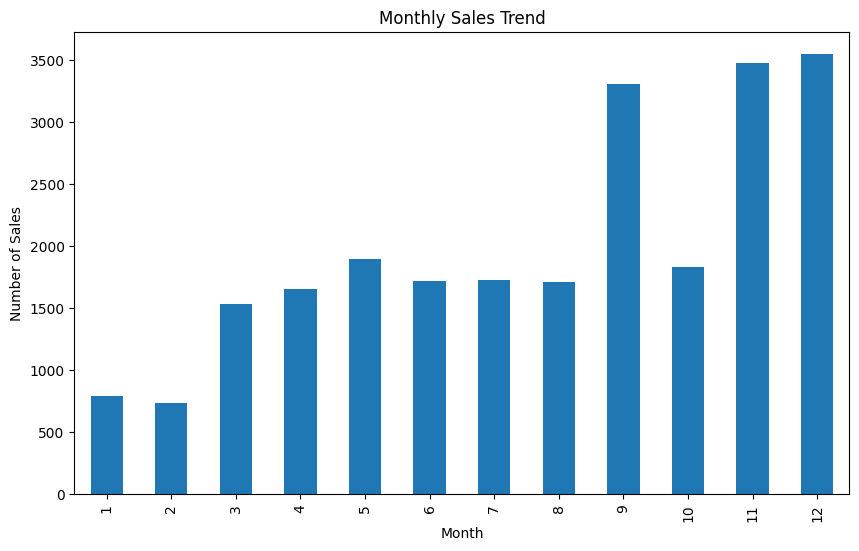

In [12]:
# Convert date and extract month
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

# Sales count by month
monthly_sales = df['Month'].value_counts().sort_index()
print("\nMonthly Sales Count:")
print(monthly_sales)

# Plot
plt.figure(figsize=(10,6))
monthly_sales.plot(kind='bar')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.show()

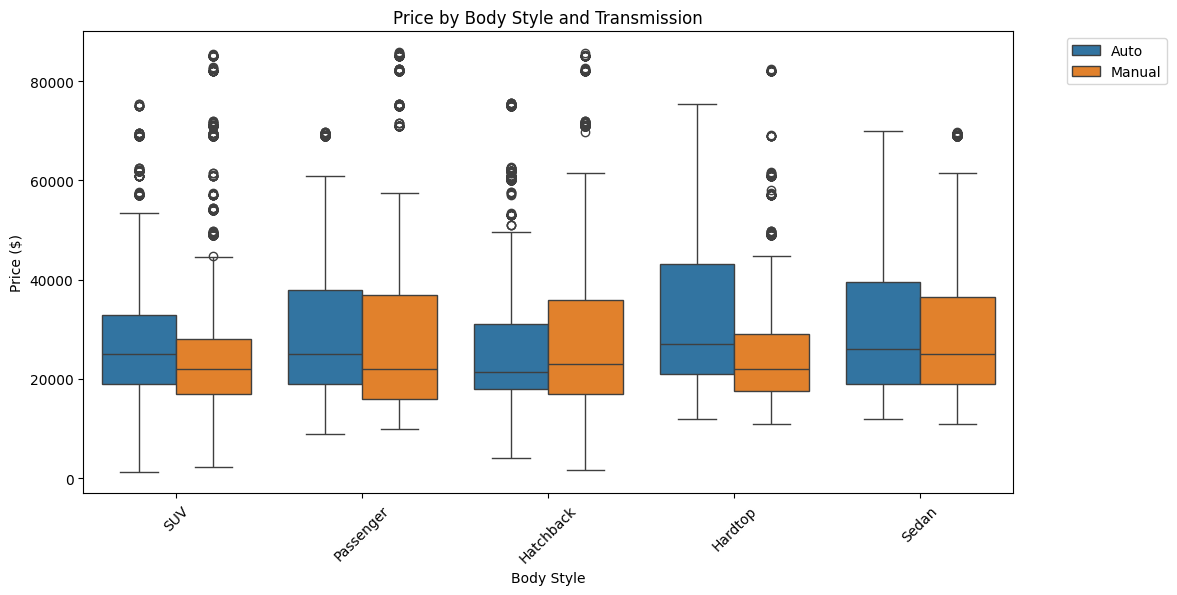

In [13]:
# Interaction between body style and transmission
plt.figure(figsize=(12,6))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df)
plt.title('Price by Body Style and Transmission')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Correlation Matrix:
               Price ($)  Engine_Num  Annual Income
Price ($)       1.000000   -0.011271       0.012065
Engine_Num     -0.011271    1.000000      -0.006598
Annual Income   0.012065   -0.006598       1.000000


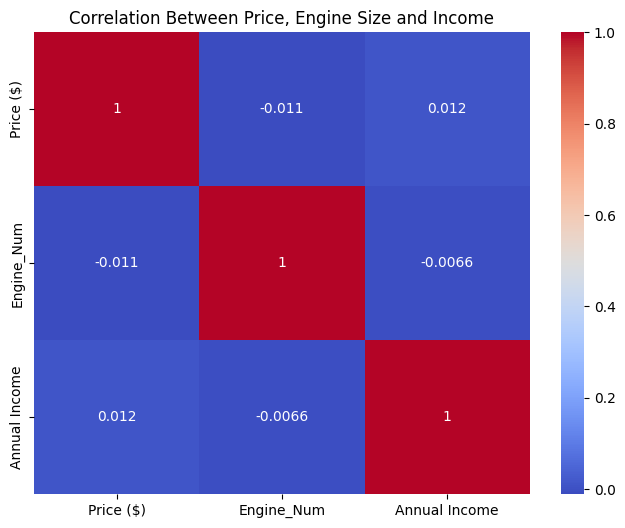

In [14]:
# Create numerical columns for correlation
df['Engine_Num'] = df['Engine'].astype('category').cat.codes
corr_matrix = df[['Price ($)', 'Engine_Num', 'Annual Income']].corr()

print("\nCorrelation Matrix:")
print(corr_matrix)

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Price, Engine Size and Income')
plt.show()

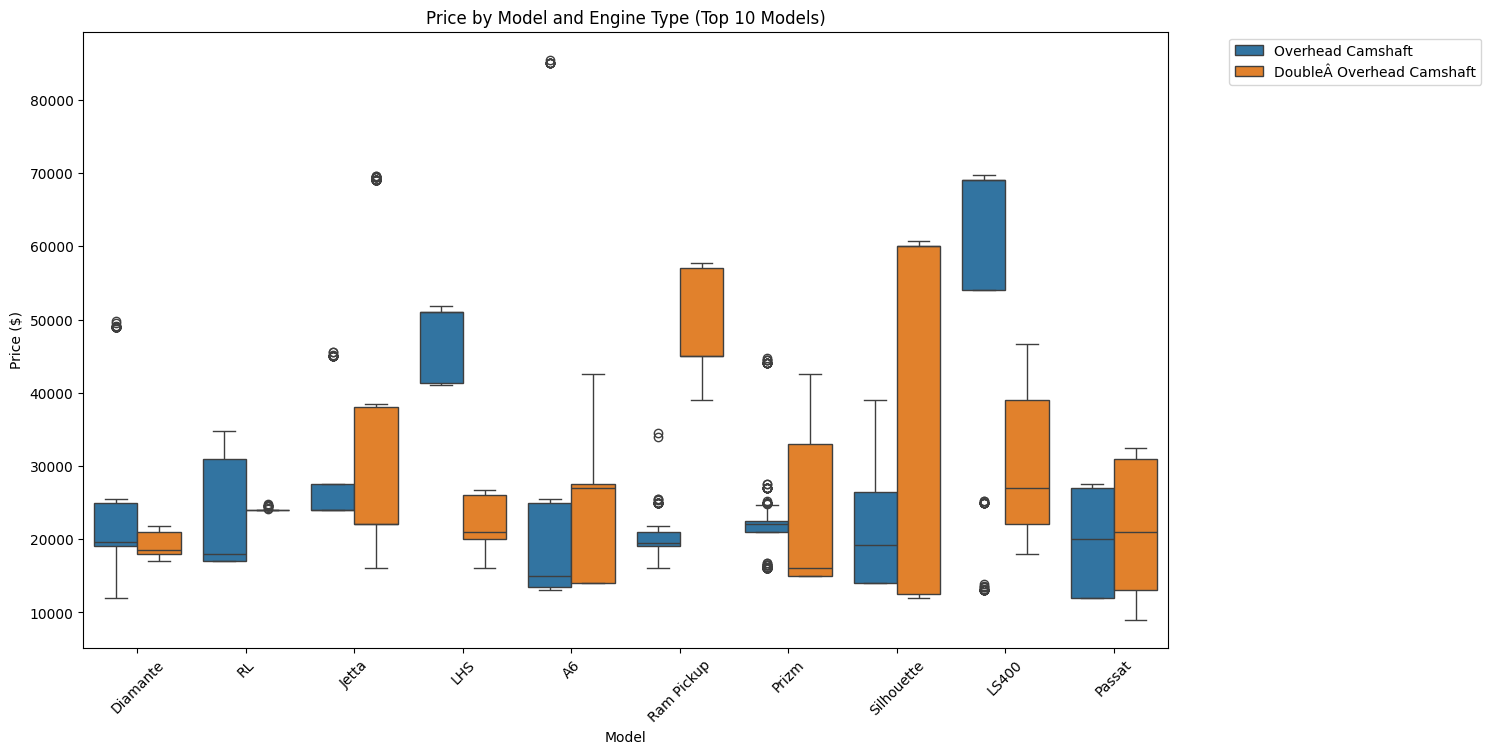

In [15]:
# Top 10 models for clarity
top_models = df['Model'].value_counts().head(10).index

plt.figure(figsize=(14,8))
sns.boxplot(x='Model', y='Price ($)', hue='Engine',
            data=df[df['Model'].isin(top_models)])
plt.title('Price by Model and Engine Type (Top 10 Models)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Amazon Sales Data

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (replace 'amazon_sales.csv' with your actual file)
df2 = pd.read_csv('amazon.csv')

df2.head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [22]:
df2['rating'] = pd.to_numeric(df2['rating'], errors='coerce')

df2_clean = df2.dropna(subset=['rating'])

average_ratings = df2_clean.groupby('category')['rating'].mean().reset_index()

average_ratings = average_ratings.sort_values(by='rating', ascending=False)
print(average_ratings)



                                              category  rating
57                       Computers&Accessories|Tablets     4.6
48   Computers&Accessories|NetworkingDevices|Networ...     4.5
62    Electronics|Cameras&Photography|Accessories|Film     4.5
38             Computers&Accessories|Components|Memory     4.5
81   Electronics|HomeAudio|MediaStreamingDevices|St...     4.5
..                                                 ...     ...
3    Computers&Accessories|Accessories&Peripherals|...     3.6
88   Electronics|HomeTheater,TV&Video|Accessories|3...     3.5
2    Computers&Accessories|Accessories&Peripherals|...     3.5
14   Computers&Accessories|Accessories&Peripherals|...     3.4
146  Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...     3.3

[211 rows x 2 columns]


In [23]:

#Q2: What are the top rating_count products by category?
df2['rating_count'] = pd.to_numeric(df2['rating_count'], errors='coerce')

df2 = df2.dropna(subset=['rating_count'])

top_products = df2.sort_values(['category', 'rating_count'], ascending=[True, False])

top_products_by_category = top_products.groupby('category').first().reset_index()

print(top_products_by_category[['category', 'product_name', 'rating_count']])

                                             category  \
0   Computers&Accessories|Accessories&Peripherals|...   
1   Computers&Accessories|Accessories&Peripherals|...   
2   Computers&Accessories|Accessories&Peripherals|...   
3   Computers&Accessories|Accessories&Peripherals|...   
4   Computers&Accessories|Accessories&Peripherals|...   
..                                                ...   
78  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...   
79  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...   
80  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...   
81  OfficeProducts|OfficePaperProducts|Paper|Copy&...   
82  OfficeProducts|OfficePaperProducts|Paper|Stati...   

                                         product_name  rating_count  
0   Lapster USB 3.0 sata Cable for 2.5 inch SSD an...         817.0  
1   Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...         974.0  
2   Amazon Basics Magic Slate 8.5-inch LCD Writing...         401.0  
3   STRIFF Mpad Mouse Mat 230X190X3

<ipython-input-24-f974fc7a3354>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2['discounted_price'], label='Discounted Price', shade=True, color='green')
<ipython-input-24-f974fc7a3354>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2['actual_price'], label='Actual Price', shade=True, color='red')


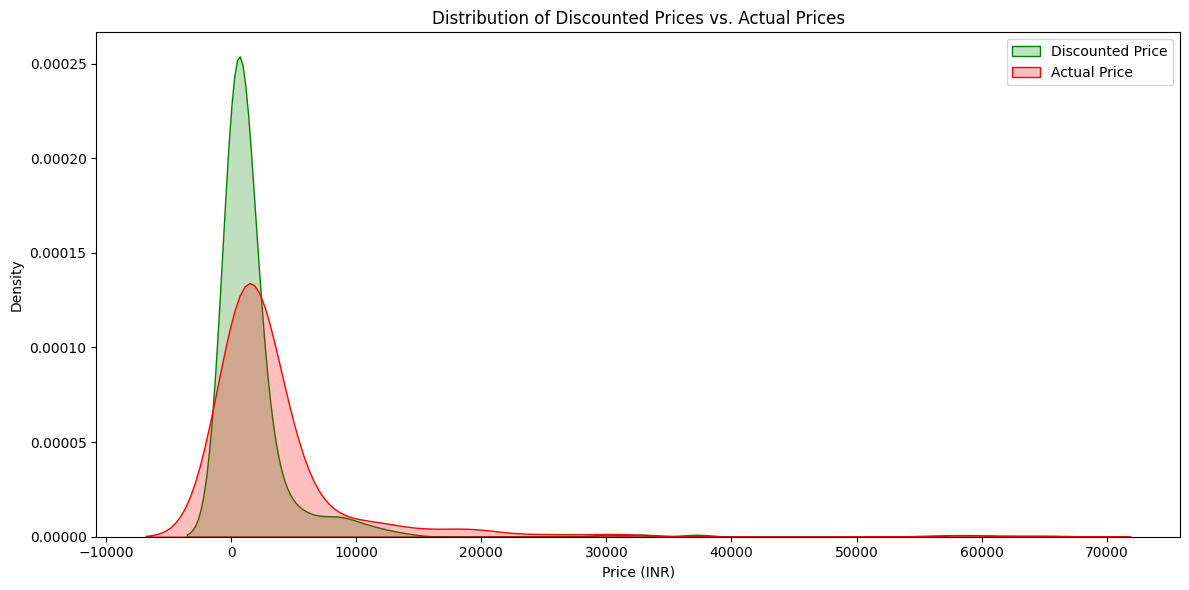

In [24]:

#Q3:What is the distribution of discounted prices vs. actual prices?
df2 = df2.dropna(subset=['discounted_price', 'actual_price'])

df2['discounted_price'] = pd.to_numeric(df2['discounted_price'].replace('[₹,]', '', regex=True))
df2['actual_price'] = pd.to_numeric(df2['actual_price'].replace('[₹,]', '', regex=True))

plt.figure(figsize=(12, 6))
sns.kdeplot(df2['discounted_price'], label='Discounted Price', shade=True, color='green')
sns.kdeplot(df2['actual_price'], label='Actual Price', shade=True, color='red')
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.xlabel('Price (INR)')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


In [25]:
#Q4:How does the average discount percentage vary across categories?
df = pd.read_csv('amazon.csv')

df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')

df = df.dropna(subset=['discounted_price', 'actual_price'])

df['discount_pct'] = ((df['actual_price'] - df['discounted_price']) / df['actual_price']) * 100

avg_discount_by_category = df.groupby('category')['discount_pct'].mean().sort_values(ascending=False)

print("Average Discount Percentage by Category:")
print(avg_discount_by_category)


Average Discount Percentage by Category:
Series([], Name: discount_pct, dtype: float64)


In [26]:

#Q5:What are the most popular product names?
popular_product_names = df['product_name'].value_counts().head(10)

print("Most Popular Product Names:")
print(popular_product_names)

Most Popular Product Names:
Series([], Name: count, dtype: int64)


In [27]:

#Q6:What are the most popular product keywords?
import pandas as pd
import re
from collections import Counter
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df = pd.read_csv('amazon.csv')

text_data = df['product_name'].fillna('') + ' ' + df['about_product'].fillna('')

all_words = re.findall(r'\b[a-z]{3,}\b', ' '.join(text_data).lower())

filtered_words = [word for word in all_words if word not in stop_words]

keyword_counts = Counter(filtered_words)
most_common_keywords = keyword_counts.most_common(10)

print("Most Popular Product-Related Keywords (without stopwords):")
for keyword, count in most_common_keywords:
    print(f"{keyword}: {count}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Most Popular Product-Related Keywords (without stopwords):
usb: 1647
cable: 1333
charging: 909
type: 876
warranty: 814
high: 671
power: 654
devices: 639
fast: 636
easy: 636


In [28]:

#Q7:What are the most popular product reviews?
popular_reviews = df['review_content'].dropna().value_counts().head(10)

print("Most Popular Product Reviews:")
print(popular_reviews)


Most Popular Product Reviews:
review_content
I am not big on camera usage, personally. I was even mentally prepared for a bad camera, based on some reviews here. But I was pleasantly surprised that camera clicks good photos. They are not awesome, but they are decent photos that can even be shared.Now coming to my biggest grouse; heating issue. The phone started heating up while charging, but it was just a little and so I could have ignored it. But then it started heating up more and got me very concerned. I even ordered a replacement thinking I got a defective piece. But then, after further tests, I found that it is heating more when I download huge amounts of data, for example, when I restore data of my old phone, from back up. This is ok with me as, I don't perform huge data loads regularly, definitely not on phone. Then I tested by running tasks I usually perform such as checking office mails, attending office meeting on phone, watching a video from Amazon Prime, and so on. The phon

In [29]:

#Q8:What is the correlation between discounted_price and rating?
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

df_corr = df.dropna(subset=['discounted_price', 'rating'])

correlation = df_corr['discounted_price'].corr(df_corr['rating'])

print(f"Correlation between Discounted Price and Rating: {correlation:.2f}")

Correlation between Discounted Price and Rating: nan


In [30]:
#Q9:' What are the Top 5 categories based on the highest rating?
import pandas as pd
df2 = pd.read_csv('amazon.csv')
df2['rating'] = pd.to_numeric(df2['rating'], errors='coerce')
df2 = df2.dropna(subset=['rating', 'category'])
df2['main_category'] = df2['category'].str.split('|').str[0]
category_ratings = df2.groupby('main_category')['rating'].mean()
top_5_categories = category_ratings.sort_values(ascending=False).head(5)

print("Top 5 Categories Based on Highest Average Rating:\n")
print(top_5_categories)

Top 5 Categories Based on Highest Average Rating:

main_category
OfficeProducts           4.309677
Toys&Games               4.300000
HomeImprovement          4.250000
Computers&Accessories    4.154967
Electronics              4.081749
Name: rating, dtype: float64


In [31]:

#Q10:Identify any potential areas for improvement or optimization based on the data analysis.
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df = df.dropna(subset=['discounted_price', 'actual_price', 'rating'])

df['discount_pct'] = ((df['actual_price'] - df['discounted_price']) / df['actual_price']) * 100

category_stats = df.groupby('category')[['rating', 'discount_pct']].mean()

optimization_opps = category_stats[
    (category_stats['rating'] < 3.0) &
    (category_stats['discount_pct'] > 30)
].sort_values(by='rating')

print("Potential Areas for Improvement (Low Rating & High Discount):")
print(optimization_opps)


Potential Areas for Improvement (Low Rating & High Discount):
Empty DataFrame
Columns: [rating, discount_pct]
Index: []


# Spotify

In [9]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
spotify_df = pd.read_csv("spotify.csv")

# Q1: Check for null values and duplicates
spotify_df_cleaned = spotify_df.dropna()
spotify_df_cleaned = spotify_df_cleaned.drop_duplicates()
print("Q1: Data Cleaned")
print("Shape after cleaning:", spotify_df_cleaned.shape)

Q1: Data Cleaned
Shape after cleaning: (413, 5)


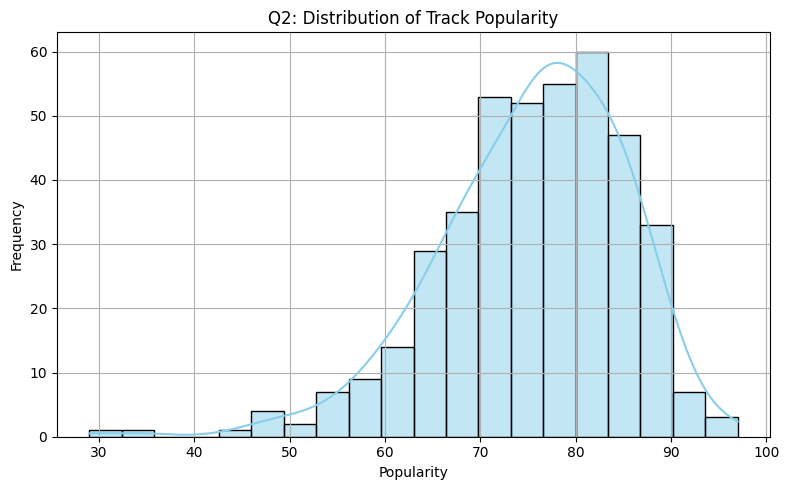

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(data=spotify_df_cleaned, x='Popularity', bins=20, kde=True, color='skyblue')
plt.title('Q2: Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


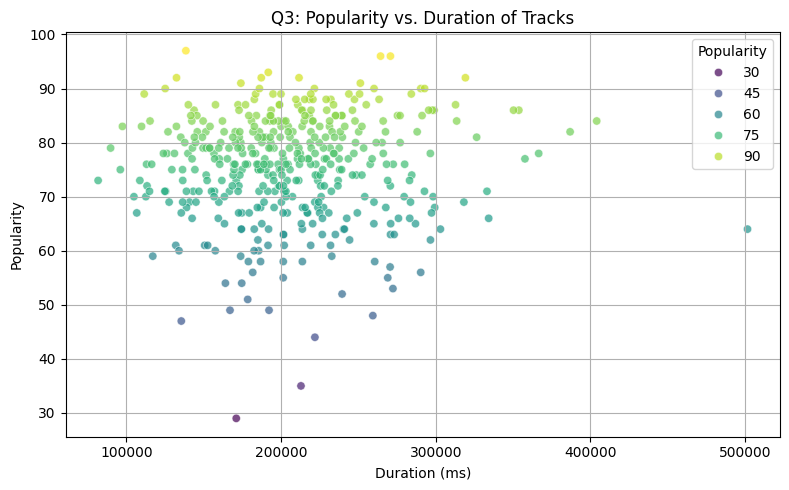

In [11]:
# Q3: Relationship between popularity and duration
plt.figure(figsize=(8, 5))
sns.scatterplot(data=spotify_df_cleaned, x='Duration (ms)', y='Popularity', hue='Popularity', palette='viridis', alpha=0.7)
plt.title('Q3: Popularity vs. Duration of Tracks')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-12-6896091f923e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=spotify_df_cleaned[spotify_df_cleaned['Artist'].isin(top_artists.index)],


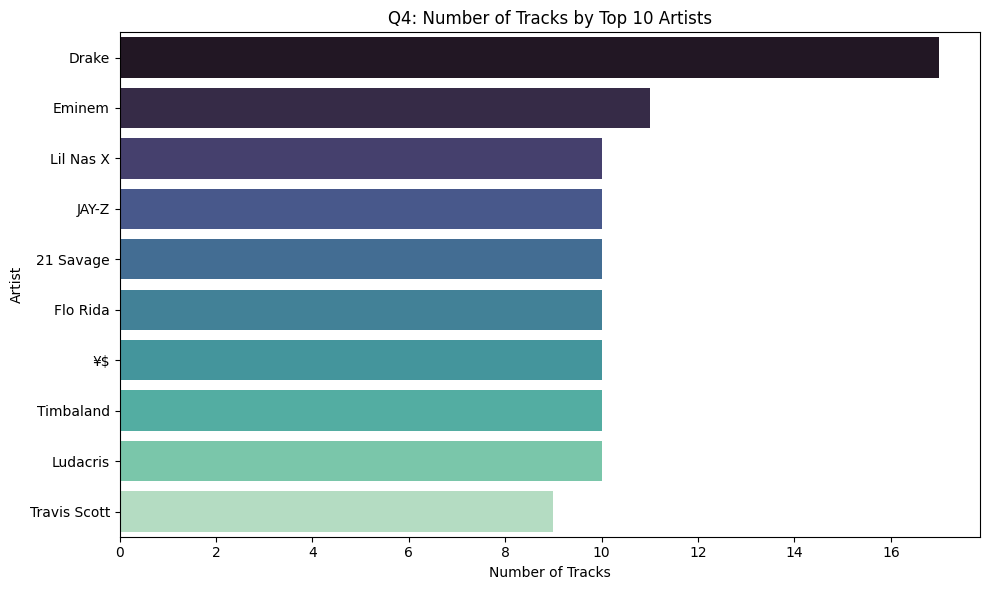

In [12]:
# Q4: Artist with the highest number of tracks
plt.figure(figsize=(10, 6))
top_artists = spotify_df_cleaned['Artist'].value_counts().head(10)
sns.countplot(data=spotify_df_cleaned[spotify_df_cleaned['Artist'].isin(top_artists.index)],
              y='Artist', order=top_artists.index, palette='mako')
plt.title('Q4: Number of Tracks by Top 10 Artists')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()

In [13]:
# Q5: Top 5 least popular tracks
least_popular_tracks = spotify_df_cleaned.sort_values(by='Popularity').head(5)
print("Q5: 5 Least Popular Tracks:")
print(least_popular_tracks[['Artist', 'Track Name', 'Popularity']])

Q5: 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [14]:
# Q6: Among top 5 most frequent artists, who has the highest average popularity
top_5_artists = spotify_df_cleaned['Artist'].value_counts().head(5).index
avg_popularity = spotify_df_cleaned[spotify_df_cleaned['Artist'].isin(top_5_artists)] \
    .groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
print("\nQ6: Average Popularity of Top 5 Artists:")
print(avg_popularity)


Q6: Average Popularity of Top 5 Artists:
Artist
21 Savage    83.800000
Eminem       83.636364
Drake        82.882353
JAY-Z        77.900000
Lil Nas X    75.900000
Name: Popularity, dtype: float64


In [15]:
# Q7: Most popular track by each of the top 5 artists
most_popular_by_artist = spotify_df_cleaned[spotify_df_cleaned['Artist'].isin(top_5_artists)] \
    .sort_values('Popularity', ascending=False).groupby('Artist').first()
print("\nQ7: Most Popular Track by Each Top 5 Artist:")
print(most_popular_by_artist[['Track Name', 'Popularity']])



Q7: Most Popular Track by Each Top 5 Artist:
                                        Track Name  Popularity
Artist                                                        
21 Savage                                   redrum          96
Drake      Rich Baby Daddy (feat. Sexyy Red & SZA)          92
Eminem                                  Without Me          90
JAY-Z                              Ni**as In Paris          86
Lil Nas X                        THATS WHAT I WANT          81


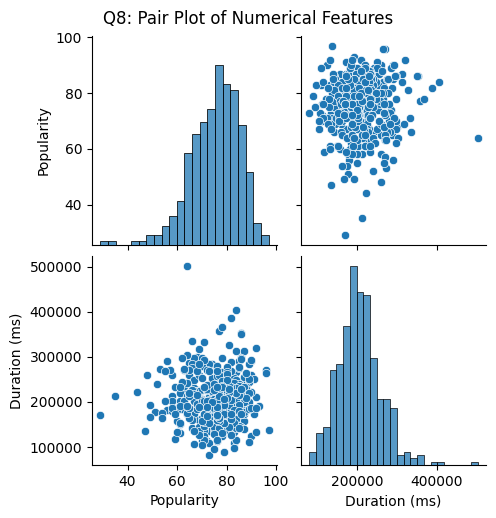

In [16]:
# Q8: Pairplot for numerical relationships
sns.pairplot(spotify_df_cleaned[['Popularity', 'Duration (ms)']])
plt.suptitle("Q8: Pair Plot of Numerical Features", y=1.02)
plt.show()

<ipython-input-17-c0c1324d7e72>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=spotify_df_cleaned[spotify_df_cleaned['Artist'].isin(top_10_artists)],


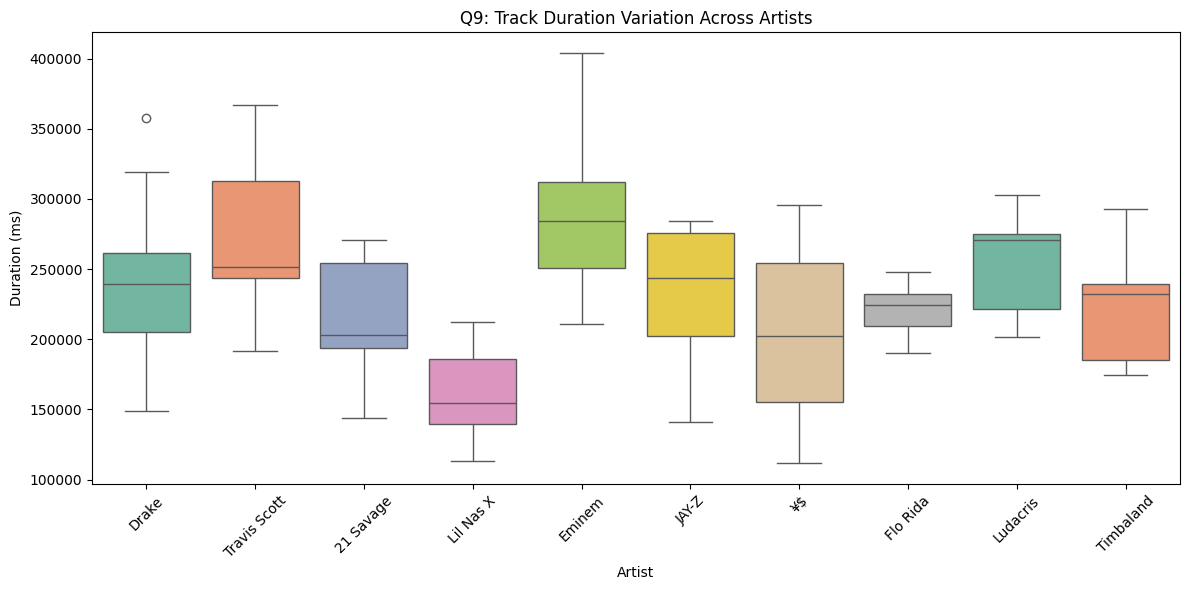

In [17]:
# Q9: Box plot of duration variation across top artists
plt.figure(figsize=(12, 6))
top_10_artists = spotify_df_cleaned['Artist'].value_counts().head(10).index
sns.boxplot(data=spotify_df_cleaned[spotify_df_cleaned['Artist'].isin(top_10_artists)],
            x='Artist', y='Duration (ms)', palette='Set2')
plt.xticks(rotation=45)
plt.title('Q9: Track Duration Variation Across Artists')
plt.tight_layout()
plt.show()

<ipython-input-18-6281c68baeeb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=spotify_df_cleaned[spotify_df_cleaned['Artist'].isin(top_10_artists)],


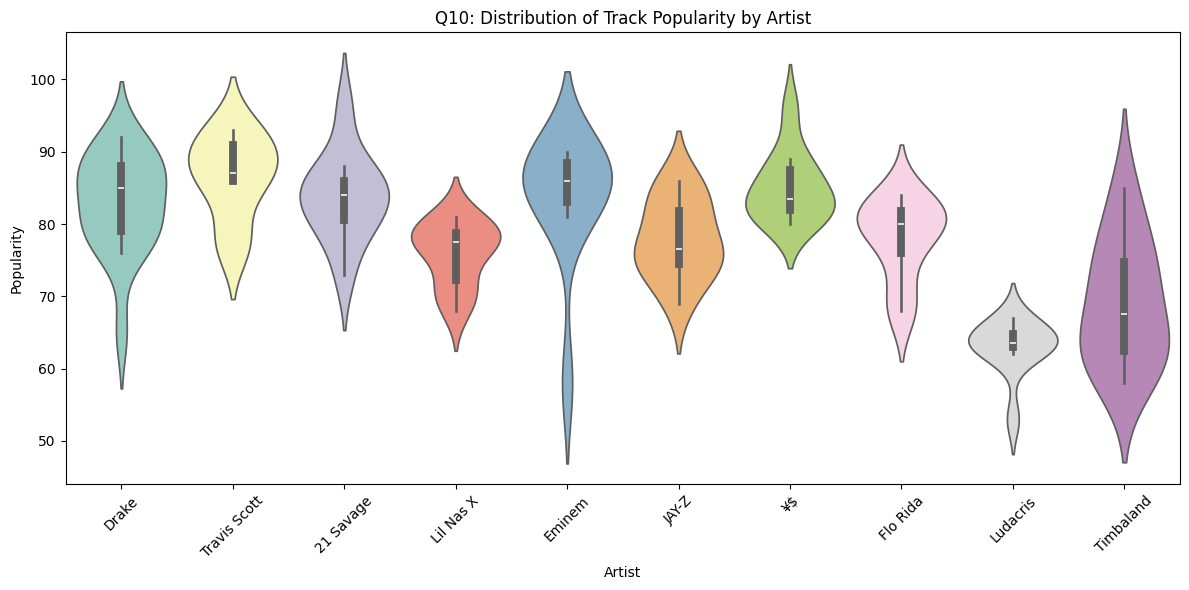

In [18]:
# Q10: Violin plot of popularity distribution by artist
plt.figure(figsize=(12, 6))
sns.violinplot(data=spotify_df_cleaned[spotify_df_cleaned['Artist'].isin(top_10_artists)],
               x='Artist', y='Popularity', palette='Set3')
plt.xticks(rotation=45)
plt.title('Q10: Distribution of Track Popularity by Artist')
plt.tight_layout()
plt.show()